In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housing.shape

(20640, 10)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.describe(include='O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


# Data Visualization

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

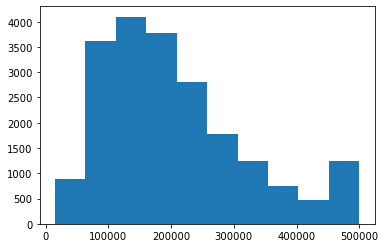

In [9]:
plt.hist(housing['median_house_value'])

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

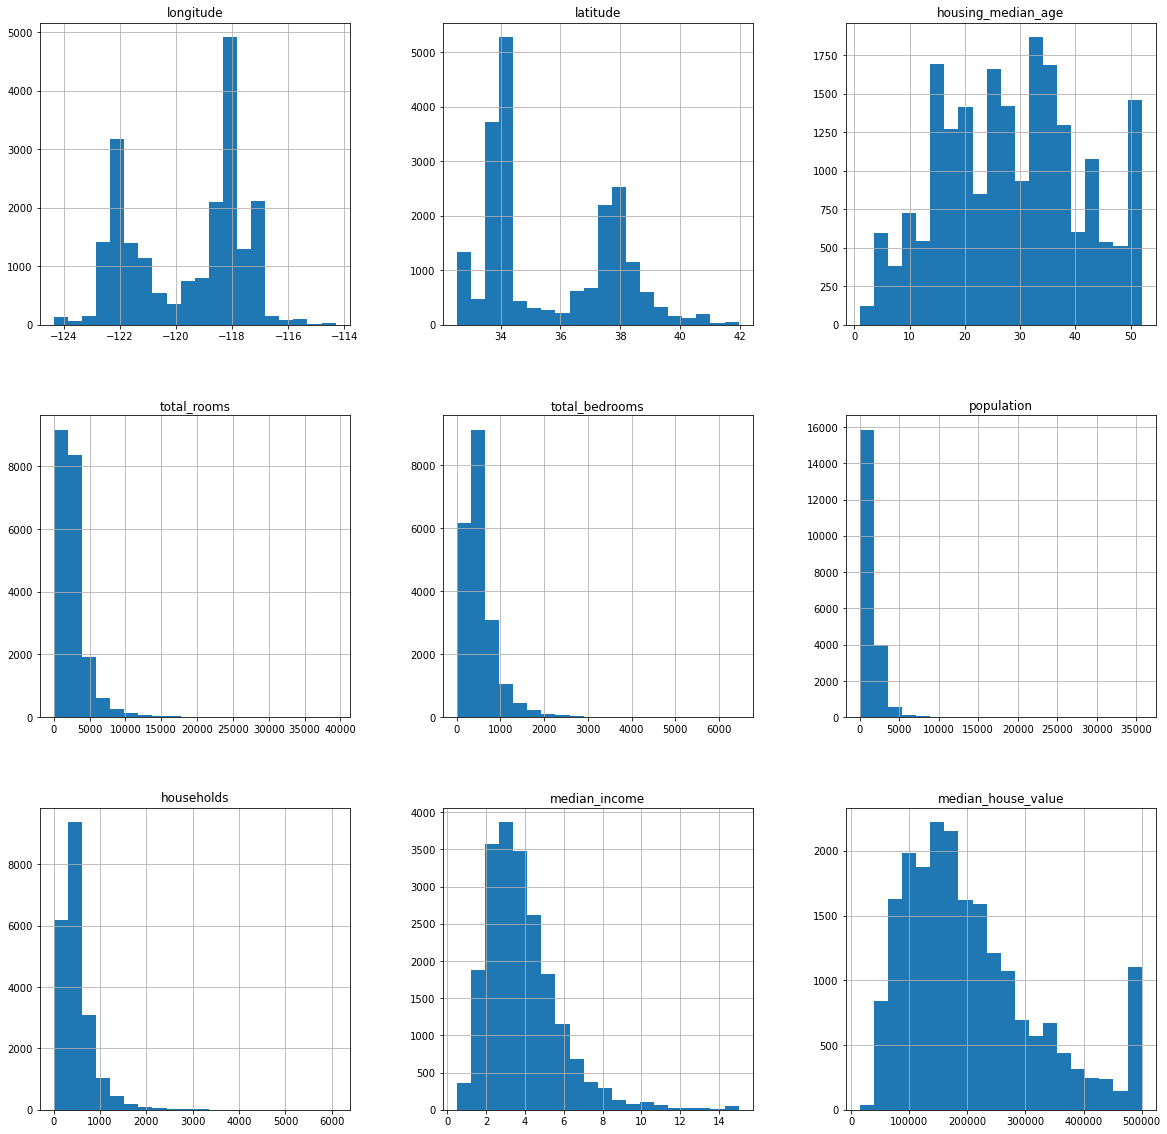

In [10]:
housing.hist(bins = 20, figsize = (20,20))

s--radius of the circle represent propulation density, c--colour of the median_house_value

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

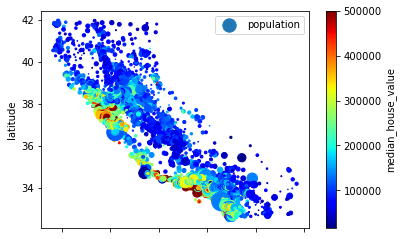

In [11]:
housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude',s=housing['population']/100,label = 'population',c = 'median_house_value',cmap = 'jet')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

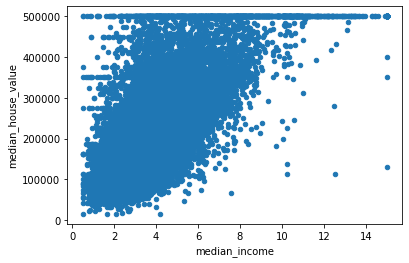

In [12]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value')

Median income is capped at 500000

C:\Users\enoch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_income'>

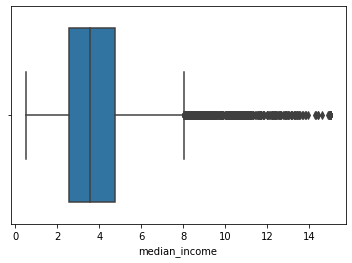

In [13]:
sns.boxplot(housing['median_income'])

Finding percentage of outliers

In [14]:
housing[housing['median_income']>8]['median_income'].count()/housing.shape[0]*100

3.343023255813953

In [15]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
5.0476      1
4.6379      1
2.9402      1
6.0256      1
5.5647      1
Name: median_income, Length: 12928, dtype: int64

# Checking for Multicollinearity

In [16]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [17]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Fixing Multicollinearity

In [18]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [19]:
housing['bedrooms_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [20]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,5.329513,0.219892,2.123209


In [21]:
housing = housing.drop(columns = ['total_rooms','total_bedrooms','population'])

In [22]:
corr_matrix = housing.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
households,0.055310,-0.071035,-0.302916,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852
bedrooms_per_rooms,0.092657,-0.113815,0.136089,0.065087,-0.615661,-0.255880,-0.416952,1.000000,0.002938
population_per_household,0.002476,0.002366,0.013191,-0.027309,0.018766,-0.023737,-0.004852,0.002938,1.000000


# Data Cleaning

In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  int64  
 3   households                20640 non-null  int64  
 4   median_income             20640 non-null  float64
 5   median_house_value        20640 non-null  int64  
 6   ocean_proximity           20640 non-null  object 
 7   rooms_per_household       20640 non-null  float64
 8   bedrooms_per_rooms        20433 non-null  float64
 9   population_per_household  20640 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


Missing Values

In [24]:
housing.bedrooms_per_rooms.isnull().sum()

207

In [25]:
housing['bedrooms_per_rooms'].describe()

count    20433.000000
mean         0.213039
std          0.057983
min          0.100000
25%          0.175427
50%          0.203162
75%          0.239821
max          1.000000
Name: bedrooms_per_rooms, dtype: float64

In [26]:
housing['bedrooms_per_rooms'] = housing['bedrooms_per_rooms'].fillna(housing["bedrooms_per_rooms"].median())

In [27]:
housing.bedrooms_per_rooms.isnull().sum()

0

Outliers in median_income

In [28]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
5.0476      1
4.6379      1
2.9402      1
6.0256      1
5.5647      1
Name: median_income, Length: 12928, dtype: int64

In [29]:
housing['median_income'].where(housing['median_income']<8,8, inplace = True)

In [30]:
housing['median_income'].value_counts()

8.0000    691
3.1250     49
2.8750     46
2.6250     44
4.1250     44
         ... 
5.1691      1
6.9790      1
2.3075      1
6.3960      1
5.5647      1
Name: median_income, Length: 12293, dtype: int64

# Preprocessing

In [31]:
housing.shape

(20640, 10)

In [32]:
ocean_proximity_dummies = pd.get_dummies(housing['ocean_proximity'])

In [33]:
ocean_proximity_dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [34]:
housing = pd.concat([housing,ocean_proximity_dummies],axis=1)

In [35]:
housing = housing.drop(columns = 'ocean_proximity')

In [36]:
housing

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,126,8.0000,452600,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21,1138,8.0000,358500,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52,177,7.2574,352100,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52,219,5.6431,341300,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52,259,3.8462,342200,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,330,1.5603,78100,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18,114,2.5568,77100,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17,433,1.7000,92300,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18,349,1.8672,84700,5.329513,0.219892,2.123209,0,1,0,0,0


In [37]:
columns = housing.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'households',
       'median_income', 'median_house_value', 'rooms_per_household',
       'bedrooms_per_rooms', 'population_per_household', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [42]:
housing

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.020556,1.000000,0.902266,0.043512,0.051768,0.001499,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.186976,1.000000,0.708247,0.038224,0.061996,0.001141,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.028943,0.900988,0.695051,0.052756,0.032796,0.001698,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.035849,0.685751,0.672783,0.035241,0.093843,0.001493,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.042427,0.446167,0.674638,0.038534,0.080107,0.001198,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.054103,0.141385,0.130105,0.029769,0.138472,0.001503,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.018582,0.274250,0.128043,0.037344,0.128009,0.001956,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.071041,0.160011,0.159383,0.030904,0.127970,0.001314,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.057227,0.182304,0.143713,0.031783,0.133214,0.001152,0.0,1.0,0.0,0.0,0.0


Independent Variables

In [44]:
X = housing.drop(columns = 'median_house_value')

Dependent Variable

In [45]:
y = housing['median_house_value']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScalar()
scaler.fit(X_train) # find mean and std deviation
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Model


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)

In [50]:
#r2_score for test dataset

r2_score(y_test,y_pred)

0.6073265996635546

In [51]:
y_pred_train = lr.predict(X_train)

In [52]:
# r2_score for training dataset

r2_score(y_train,y_pred_train)

0.6405123266340924

Remarks : Linear regression is poorly performing for the dataset

Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
tree_reg = DecisionTreeRegressor()

In [55]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [56]:
y_pred_Dt = tree_reg.predict(X_test)

In [57]:
#r2_score for test dataset

r2_score(y_test,y_pred_Dt)

0.638746547540501

In [58]:
y_pred_Dt_train = tree_reg.predict(X_train)

In [59]:
#r2_score for training dataset

r2_score(y_train,y_pred_Dt_train)

1.0

Remarsk : Overfitting model : We can see model is highly overfitting, model is having high r2_score or training dataset andpoor                               r2_score on test dataset. Rsulting in high variance

Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
forest_reg = RandomForestRegressor()

In [62]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred_Rf = forest_reg.predict(X_test)

In [64]:
# r2_score for test dataset

r2_score(y_test,y_pred_Rf)

0.8128308144614719

In [65]:
# r2_score for training dataset

y_pred_Rf_train = forest_reg.predict(X_train)

In [66]:
r2_score(y_train,y_pred_Rf_train)

0.9745524656602879

# Fine Tuning